# Spotify Data Analysis

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
spotify_song_data= pd.read_csv("C:\\Users\\ANUSHA\\Desktop\\Sem4\\ML Project\\19000-spotify-songs\\song_data.csv")

## Loading data

In [3]:
song_data=spotify_song_data.copy()

In [4]:
song_data.shape

(18835, 15)

## Cleaning Data

In [5]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [6]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [7]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [8]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

### If song popularity is above 70 then 1 else 0

In [9]:
song_data["popularity"]= [ 1 if i>=70 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    14384
1     4451
Name: popularity, dtype: int64

In [10]:
p=song_data[song_data["popularity"]==1]
p.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,4451.000000,4451.000000,4451.000000,4451.000000,4451.00000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.0
mean,78.996630,218759.741182,0.205759,0.666539,0.66148,0.017081,5.146709,0.173100,-6.447939,0.611548,0.107827,120.804441,3.975062,0.519917,1.0
std,7.590576,47607.918329,0.237503,0.146182,0.18032,0.096281,3.681695,0.135505,2.869713,0.487453,0.101882,27.385798,0.247337,0.228177,0.0
min,70.000000,95316.000000,0.000018,0.072200,0.00289,0.000000,0.000000,0.021500,-31.994000,0.000000,0.022800,60.048000,1.000000,0.035200,1.0
25%,73.000000,190295.000000,0.027900,0.571500,0.54500,0.000000,1.000000,0.091500,-7.648000,0.000000,0.039400,98.970000,4.000000,0.336500,1.0
50%,77.000000,212500.000000,0.106000,0.676000,0.68000,0.000000,5.000000,0.120000,-5.892000,1.000000,0.060200,119.886000,4.000000,0.510000,1.0
75%,84.000000,240687.500000,0.294500,0.768000,0.80050,0.000077,8.000000,0.203000,-4.590000,1.000000,0.136000,139.910000,4.000000,0.692000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.99600,0.968000,11.000000,0.978000,-0.739000,1.000000,0.733000,205.999000,5.000000,0.980000,1.0


### Correlation with features

In [11]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.660385
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.005092
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.101694
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.117811
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.042833
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.152954
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.021929
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.025308
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.145254
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.019096


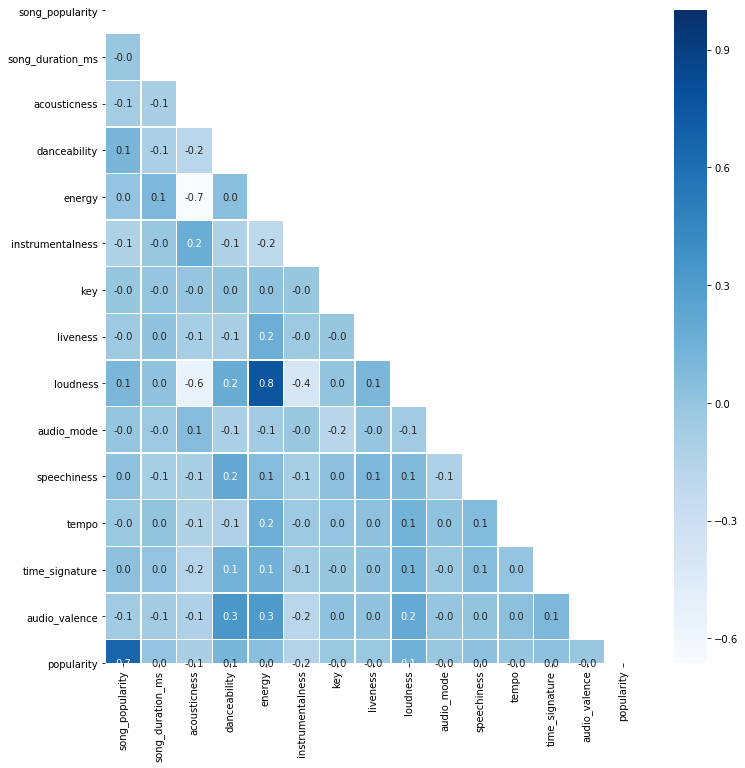

In [12]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 is moderate. Except two of them all the correlations are quite low. Comparing the correlation between song_popularity and all other features, there is no linear relationship which gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

## Features

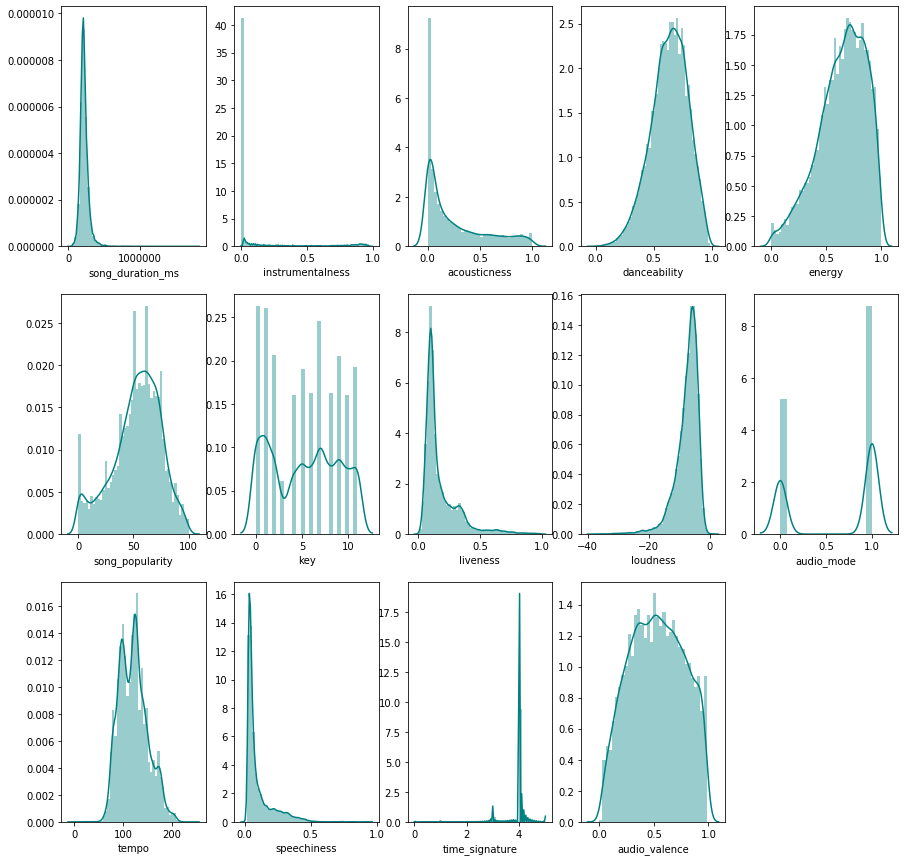

In [13]:
f, axes = plt.subplots(3, 5, figsize=(15, 15))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()


In [14]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [15]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

## Data Preparation

In [16]:
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (13, 15068)
x_test:  (13, 3767)
y_train:  (15068,)
y_test:  (3767,)


## Logistic Regression

### Initializing Paramaters and sigmoid function 

In [17]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [18]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      

    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

### Updating Learning Parameters

In [19]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [20]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.708830
Cost after iteration 10: 0.678699
Cost after iteration 20: 0.654520
Cost after iteration 30: 0.635092
Cost after iteration 40: 0.619446
Cost after iteration 50: 0.606810
Cost after iteration 60: 0.596572
Cost after iteration 70: 0.588250
Cost after iteration 80: 0.581460
Cost after iteration 90: 0.575903
Cost after iteration 100: 0.571338
Cost after iteration 110: 0.567576
Cost after iteration 120: 0.564465
Cost after iteration 130: 0.561885
Cost after iteration 140: 0.559739
Cost after iteration 150: 0.557947
Cost after iteration 160: 0.556448
Cost after iteration 170: 0.555189
Cost after iteration 180: 0.554129
Cost after iteration 190: 0.553234


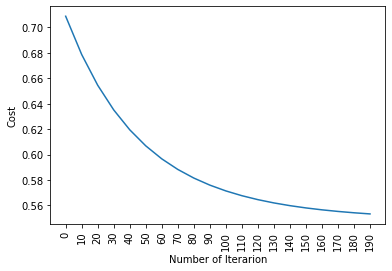

train accuracy: 76.30076984337668 %
test accuracy: 76.63923546588798 %


In [21]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

In [22]:
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

### ROC Curve

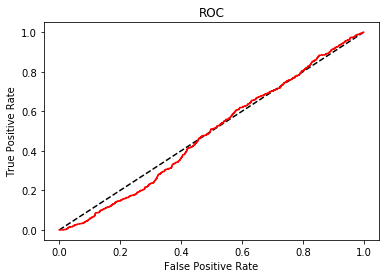

In [23]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l1'}
Best Accuracy: 0.7630076984337669


In [25]:
Logistic_score=logreg_cv.best_score_

## Ridge and Lasso Regression

In [26]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Ridge

In [27]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.1)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
#print('Ridge score: ',ridge.score(x_test,y_test))
print("Test accuracy:",root_mean_squared_error(y_test,ridge_predict))

Test accuracy: 0.41263033819197653


In [28]:
Ridge_score= root_mean_squared_error(y_test,ridge_predict)

### Lasso

In [29]:
from sklearn.linear_model import Lasso
x = np.array(song_data.loc[:,['danceability','energy','audio_valence','tempo','song_duration_ms','acousticness','instrumentalness','key','liveness','loudness','audio_mode','speechiness']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.2)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso coefficients: ',lasso.coef_)
print("Test accuracy:",root_mean_squared_error(y_test,lasso_predict))

Lasso coefficients:  [ 0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.]
Test accuracy: 0.41723753012000914


In [30]:
Lasso_Score=root_mean_squared_error(y_test,lasso_predict)

In [31]:
x= ['song_duration_ms', 'acousticness', 'danceability',
     'energy', 'instrumentalness', 'key', 'liveness',
     'loudness', 'audio_mode', 'speechiness', 'tempo', 
     'time_signature', 'audio_valence']
y= ['popularity']

In [32]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(x_train, 
                                                         y_train).predict(x_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(x_train, 
                                                          y_train).predict(x_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [33]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models,song_data)

,OLS,Lasso,Ridge
0,0.053891,0.000016,0.05389
1,0.052069,-0.001290,0.05206


In [34]:
test(models,song_data)

,OLS,Lasso,Ridge
0,0.053891,0.000016,0.05389
1,0.052069,-0.001290,0.05206


## KNN Algorithm

### To Predict

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


### Test

In [36]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.995022564374834
With KNN (K=3) test accuracy is:  0.8348818688611628


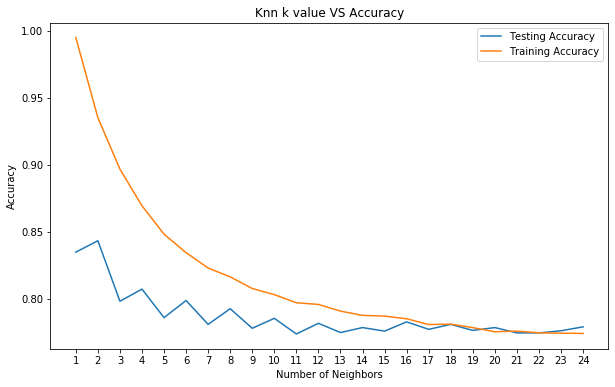

Best accuracy is 0.8433766923281125 with K = 2


In [37]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [38]:
KKN_Score= max(test_accuracy)

## SVM

In [39]:
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.9888505441996284
Test accuracy of svm algo: 0.9203610299973454


In [40]:
SVM_score= svm.score(x_test,y_test)

## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))

Train accuracy of naive bayes: 0.7606185293336872
Test accuracy of naive bayes: 0.7759490310591983


In [42]:
Naive_bayes_score=nb.score(x_test,y_test)

## Decision Tree Classifier

In [43]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train ccuracy of decision tree: 0.9957525882665251
Test accuracy of decision tree: 0.8431112290947703


## Comparing Performances

In [48]:
model_performances=pd.DataFrame({'Model':['SVM','K-NearestNeighbors','DesicionTreeClassifier','NaiveBayes','LogisticRegession','Lasso','Ridge'],
                                 'Accuracy':[SVM_score,KKN_Score,DecisionTree_score,Naive_bayes_score,Logistic_score,Lasso_Score,Ridge_score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,SVM,0.920361
1,K-NearestNeighbors,0.843377
2,DesicionTreeClassifier,0.843111
3,NaiveBayes,0.775949
4,LogisticRegession,0.763008
5,Lasso,0.417238
6,Ridge,0.412630


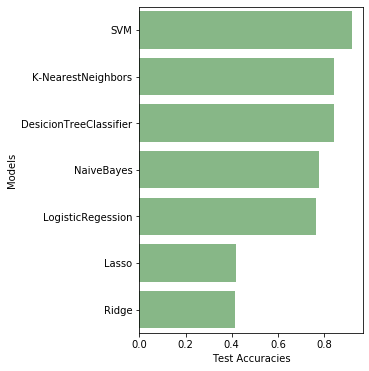

In [49]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()